# Hopfield Network Examples

In [1]:
import numpy as np
from hop import Hopfield
from utils import read_images, img_to_pattern, perturbe, show

## Example 1: Pattern With Three Values

In [2]:
# Input Patterns
p1 = np.array([[1, 1, -1]]).T
p2 = np.array([[1, -1, -1]]).T
P = np.hstack((p1, p2))

In [3]:
# Hopfield Network
hop = Hopfield(P)
v = np.array([[-1, 1, 1]]).T
output = hop.predict(v)
print(f"Weight Matrix:\n{hop.W}")

Pattern is no longer improving. Returning the last updated pattern.

Weight Matrix:
[[ 0.  0. -2.]
 [ 0.  0.  0.]
 [-2.  0.  0.]]


In [4]:
# Results
print("Saved Patterns: ", P.T, sep='\n', end=('\n' + '-'*25 + '\n'))
print(f"Input: {v.T}", f"Output: {output.T}", sep='\n')

Saved Patterns: 
[[ 1  1 -1]
 [ 1 -1 -1]]
-------------------------
Input: [[-1  1  1]]
Output: [[-1  1  1]]


## Example 2: Pattern With Four Values

In [5]:
# Input Patterns
p1 = np.array([[-1, -1, -1, -1]]).T
p2 = np.array([[1, 1, 1, 1]]).T
P = np.hstack((p1, p2))

In [6]:
# Hopfield Network
hop = Hopfield(P)
v = np.array([[-1, 1, 1, 1]]).T
output = hop.predict(v)
print(f"Weight Matrix:\n{hop.W}")

Pattern is no longer improving. Returning the last updated pattern.

Weight Matrix:
[[0. 2. 2. 2.]
 [2. 0. 2. 2.]
 [2. 2. 0. 2.]
 [2. 2. 2. 0.]]


In [7]:
# Results
print("Saved Patterns: ", P.T, sep='\n', end=('\n' + '-'*25 + '\n'))
print(f"Input: {v.T}", f"Output: {output.T}", sep='\n')

Saved Patterns: 
[[-1 -1 -1 -1]
 [ 1  1  1  1]]
-------------------------
Input: [[-1  1  1  1]]
Output: [[1 1 1 1]]


In [8]:
# Limit Cycle
v = np.array([[-1, -1, 1, 1]]).T
output = hop.predict(v)
print(f"Input: {v.T}", f"Output: {output.T}", sep='\n')

Reached a limit cycle. Returning the last updated pattern.

Input: [[-1 -1  1  1]]
Output: [[-1 -1  1  1]]


## Example 3: Persian Characters

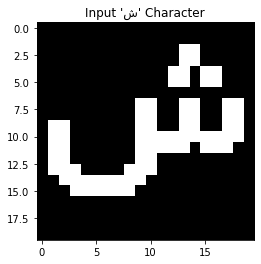

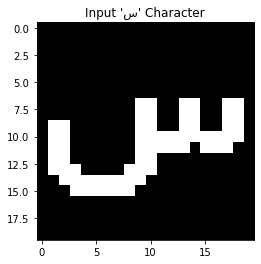

In [16]:
# Input Images
images = read_images('./images/*.png')
P = img_to_pattern(images)
show(P.T[0], "Input 'ش' Character")
show(P.T[1], "Input 'س' Character")

In [10]:
# Adding Noise
p1 = perturbe(P.T[0], alpha=0.4)
p2 = perturbe(P.T[1], alpha=0.4)

In [11]:
# Hopfield Network
hop = Hopfield(P)
output1 = hop.predict(p1, update_type='async', iterations=400)
output2 = hop.predict(p2, update_type='async', iterations=400)

Maximum number of iterations reached. Returning the last updated pattern.

Maximum number of iterations reached. Returning the last updated pattern.



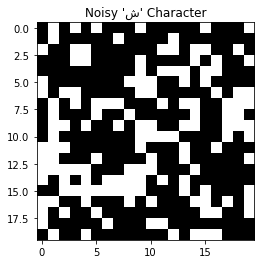

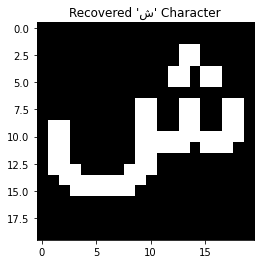

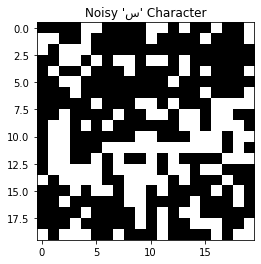

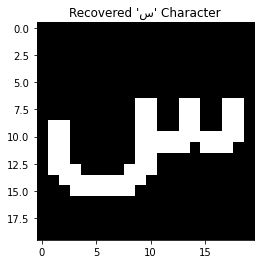

In [17]:
# Results
show(p1, "Noisy 'ش' Character")
show(output1, "Recovered 'ش' Character")
show(p2, "Noisy 'س' Character")
show(output2, "Recovered 'س' Character")